# Testing reading and handling NIfTI files
http://nipy.org/nibabel/gettingstarted.html

In [1]:
# external imports
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
import time

# local imports
from nifti import *

C:\Users\johnh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


**type(img)**: nibabel.nifti1.Nifti1Image<br>
**shape**: (length(x), length(y), total number of slices)<br>
**[data type](https://docs.scipy.org/doc/numpy/user/basics.types.html)** is uint16, unsigned integer (0 to 65535)

# Load and view nifti test file

In [2]:
img = nib.load('nifti_test.nii.gz')
print('img.shape = {}'.format(img.shape))
print('dtype == uint16?: {}'.format(img.get_data_dtype() == np.dtype(np.uint16)))
data = img.get_fdata()

img.shape = (57, 67, 56)
dtype == uint16?: False


nrows: 6, ncols: 10, nslices: 57


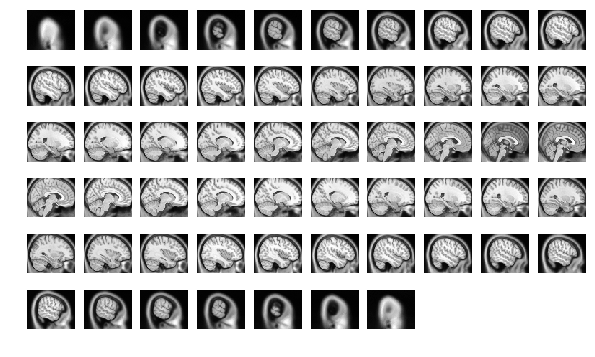

In [3]:
plot_dim(img, dim=0)

# Load dataset into dataframe

## Load file names and labels

In [4]:
df = pd.read_csv('GT_Training.csv', header=None, names=['file','label'])
df.file = df.file.map(lambda x: x.replace("'",''))
df['nifti'] = np.nan
print_shape(df)

shape=(1472, 3)


## Load image data

In [5]:
start = time.time()
df.nifti = df.file.map(lambda x: nib.load('data\\' + str(x) + '.nii.gz'))
print('nifti files loaded in {0:.3}s'.format(time.time() - start))

nifti files loaded in 3.54s


In [6]:
print_shape(df)
df.head(3)

shape=(1472, 3)


,file,label,nifti
0,I004_1,0.0,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...
1,I004_2,0.0,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...
2,I004_3,1.0,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...


nrows: 5, ncols: 10, nslices: 50


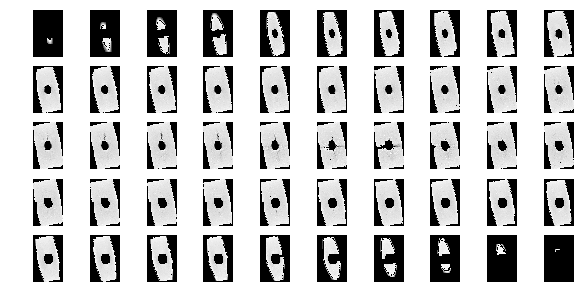

In [7]:
plot_dim(img=df.nifti[0], dim=2)